## 課題1 解答例
---
正規分布に従うノイズがのったy = a * x + bの（x, y）組のデータセットに、  
最小二乗法による線形回帰（単回帰）を適用し、回帰係数と切片を求めなさい。  
また、そのプログラムをTensorFlowを使用し作成せよ　

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [19]:
b_train = -1
w_train = 0.7
#[0.0以上、1.0未満）の乱数が入った(1,100)行列
x_train = np.random.random((1,100))
z = 0.1*np.random.randn(1,100)
#np.random.randn(1,100)は平均0、標準偏差1の正規分布に従う乱数が入った(1,100)行列
t_train = x_train * w_train + b_train + z

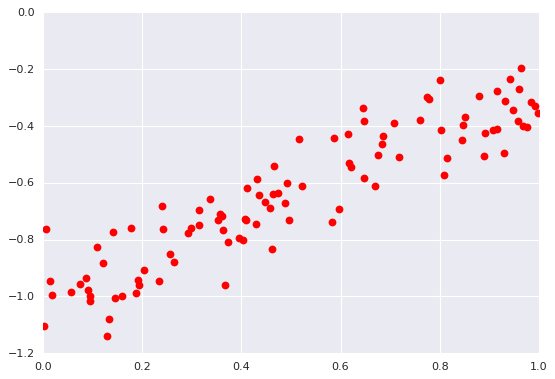

In [20]:
plt.figure(1)
plt.plot(x_train,t_train,'ro',label='Data')
plt.show()

In [23]:
#入力層
x = tf.placeholder(dtype=tf.float32,shape=(None,100),name="input")
t = tf.placeholder(dtype=tf.float32,shape=(None,100))
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
#出力層
#回帰問題では活性化関数は恒等関数(何も手を加えず出力する)
p = tf.multiply(x,w) + b

# 回帰問題には損失関数として2乗和誤差を使う
cross_entropy = tf.square(p - t)
loss = tf.reduce_sum(cross_entropy) / 2 

# Optimizer
# 勾配降下法 学習率0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(loss)

# トレーニング回数
train_step = 3000

In [24]:
### 学習の実行
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    i = 0
    for i in range(train_step):
        # トレーニング
        sess.run(train_op, feed_dict={x:x_train,t:t_train})
        # 200ステップごとに途中経過を表示
        if i % 200 == 0:
            loss_output = sess.run(loss, feed_dict={x:x_train, t:t_train})
            w_output = sess.run(w)
            b_output = sess.run(b)
            print "Step %i, cost %f, weight %f, bias %f" % (i, loss_output, w_output, b_output)

Step 0, cost 17.829132, weight -1.022888, bias -0.389881
Step 200, cost 0.456713, weight 0.731978, bias -1.011271
Step 400, cost 0.456713, weight 0.731978, bias -1.011271
Step 600, cost 0.456713, weight 0.731978, bias -1.011271
Step 800, cost 0.456713, weight 0.731978, bias -1.011271
Step 1000, cost 0.456713, weight 0.731978, bias -1.011271
Step 1200, cost 0.456713, weight 0.731978, bias -1.011271
Step 1400, cost 0.456713, weight 0.731978, bias -1.011271
Step 1600, cost 0.456713, weight 0.731978, bias -1.011271
Step 1800, cost 0.456713, weight 0.731978, bias -1.011271
Step 2000, cost 0.456713, weight 0.731978, bias -1.011271
Step 2200, cost 0.456713, weight 0.731978, bias -1.011271
Step 2400, cost 0.456713, weight 0.731978, bias -1.011271
Step 2600, cost 0.456713, weight 0.731978, bias -1.011271
Step 2800, cost 0.456713, weight 0.731978, bias -1.011271


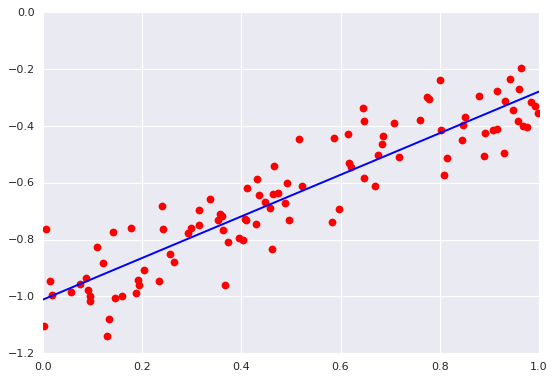

In [25]:
# 得られた w_outputとb_outputでグラフを表示する
x_line = np.linspace(0, 1.0, 100)
t_output = x_line * w_output + b_output
plt.figure()
plt.plot(x_train,t_train,'ro',label='Data')
plt.plot(x_line,t_output,'b-')
plt.show()

## 課題2 解答例
---
下記座標群から、最小二乗法による線形回帰（単回帰）を適用し、回帰係数と切片を求めなさい。  
また、そのプログラムをTensorFlowを使用し作成せよ

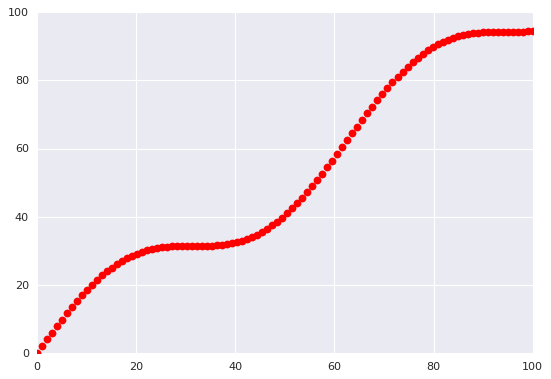

In [26]:
# coding:utf-8
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

x_train = np.linspace(0, 100, 100)
t_train = x_train + 10*np.sin(x_train/10)

plt.figure(1)
plt.plot(x_train, t_train, 'ro', label='Data')
plt.show()

In [27]:
x_train_reshape = x_train.reshape(1,100)
t_train_reshape = t_train.reshape(1,100)

In [39]:
#入力層
x = tf.placeholder(dtype=tf.float32,shape=(None,100),name="input")
t = tf.placeholder(dtype=tf.float32,shape=(None,100))
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
#出力層
#回帰問題では活性化関数は恒等関数(何も手を加えず出力する)
p = tf.multiply(x,w) + b

# 回帰問題には損失関数として2乗和誤差を使う
cross_entropy = tf.square(p - t)
loss = tf.reduce_sum(cross_entropy) / 2

# Optimizer
# 勾配降下法 学習率 1e-6
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-6)
train_op = optimizer.minimize(loss)

# トレーニング回数
train_step = 3500

In [40]:
### 学習の実行
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    i = 0
    for i in range(train_step):
        # トレーニング
        sess.run(train_op, feed_dict={x:x_train_reshape,t:t_train_reshape})
        # 200ステップごとに途中経過を表示
        if i % 200 == 0:
            loss_output = sess.run(loss, feed_dict={x:x_train_reshape, t:t_train_reshape})
            w_output = sess.run(w)
            b_output = sess.run(b)
            print "Step %i, cost %f, weight %f, bias %f" % (i, loss_output, w_output, b_output)

Step 0, cost 127395.515625, weight 0.131630, bias 1.757153
Step 200, cost 2206.410889, weight 0.995870, bias 1.774541
Step 400, cost 2206.311768, weight 0.995803, bias 1.779007
Step 600, cost 2206.212646, weight 0.995737, bias 1.783451
Step 800, cost 2206.115723, weight 0.995671, bias 1.787873
Step 1000, cost 2206.017822, weight 0.995605, bias 1.792272
Step 1200, cost 2205.923340, weight 0.995540, bias 1.796649
Step 1400, cost 2205.827637, weight 0.995475, bias 1.801004
Step 1600, cost 2205.733887, weight 0.995410, bias 1.805337
Step 1800, cost 2205.641602, weight 0.995346, bias 1.809649
Step 2000, cost 2205.548340, weight 0.995282, bias 1.813939
Step 2200, cost 2205.458252, weight 0.995218, bias 1.818207
Step 2400, cost 2205.368652, weight 0.995155, bias 1.822451
Step 2600, cost 2205.279053, weight 0.995092, bias 1.826674
Step 2800, cost 2205.189697, weight 0.995029, bias 1.830877
Step 3000, cost 2205.102295, weight 0.994967, bias 1.835058
Step 3200, cost 2205.016357, weight 0.994905,

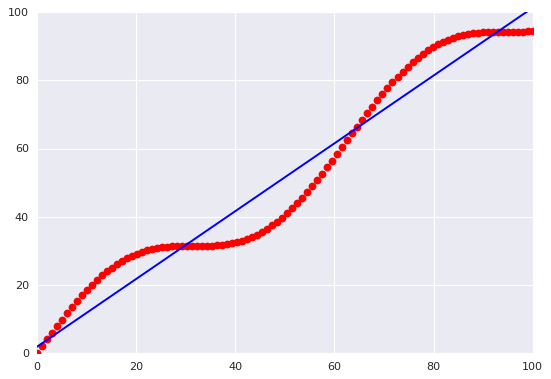

In [41]:
# 得られた w_outputとb_outputでグラフを表示する
t_output = x_train * w_output + b_output
plt.figure()
plt.ylim(0,100)
plt.plot(x_train,t_train,'ro',label='Data')
plt.plot(x_train,t_output,'b-')
plt.show()